** Homework six (25 Points)**

• (Reading) Ch5, Machine Learning [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), up to and including Linear Regression; and the in-class reading ** cross_validation_forEconomists ** on polylearn. 

• (UnGraded) DataCamp chapter in Supervised Learning with scikit-learn: **Regression** and **Fine Tuning Your Model**. For the Tuning chapter focus on the lessons including and following (Hyperparameter tuning). Quiz questions will be from these chapters and the reading.

• (Graded) Below notebook on fine tuning your model. If you're working in a group (max 3 people) please do submit it as a group. Submit only one assignment. You will both receive credit. This homework is longer and will count as hw6 and hw7 - 20 points. The code is very similar to our in-class exercise, therefore, points are granted for understanding of the output. 

In [19]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [20]:
# Load the Ladybug data
'''In 1983 an article was published about ladybird beetles and their 
behavior changes under different temperature conditions (N. H. Copp. Animal Behavior, 31,:424-430). 
An experiment was run to see how many beetles stayed in light as temperature changed.
'''

# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
y = df[['Lighted']]
X = df[['Temp']]

In [21]:
# Show the first 5 observations (1 point)
# your code here

df.head()

,Temp,Lighted
0,-2,28
1,-1,29
2,0,22
3,1,28
4,2,34


# Linear Regression, Part I  

In [22]:
# (1 point)
# Create training and test sets with 0.3 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create linear regression object call ols
ols = LinearRegression()
  
# Train the model using the training sets
ols.fit(X_train, y_train)

# Report the coefficient 
print(ols.coef_)

[[0.36019191]]


## Plot outputs

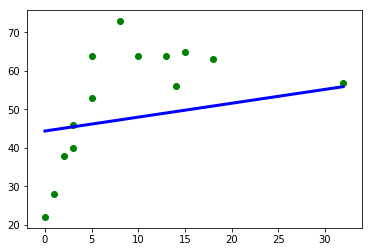

In [23]:
# (1 point)
# This plots the predicted ols fitted line
min = X_test.min()
max = X_test.max() 
predictor_space = pd.DataFrame(np.arange(min, max,  0.05))
plt.plot(predictor_space, ols.predict(predictor_space), color='blue', linewidth=3)

# Scatter plot the actual test data 
plt.scatter(X_test,y_test, color='green')


## Predict on the Test data

In [24]:
# Get the predicted y_pred using the test data
y_pred = ols.predict(X_test)

# Compute and print the R^2 and RMSE
print("R^2: {}".format(ols.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.08740846832496296
Root Mean Squared Error: 14.112210226293536


## a. Does this plot look like a good fit to the data? # (1 point)

No this plot does not look like a good fit to the data.  Most of the data is concentrated between 0 and 5 and there is a large outlier past 30. 


## b. What do out of sample metrics tell you? (1 point)
The R^2 value really low meaning twe are not predicting y well.  The large outliers cause the high mean squared error because of high residuals.  There is a high bias and low variance in the data.

# Polynomial Regression, Part II

In [25]:
#(2 points)
# Reload the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
yp = df[['Lighted']]
Xp = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)
Xp = pd.DataFrame(poly.fit_transform(Xp))
print("Dimensions of X after reshaping: {}".format(Xp.shape))

# Create training and test sets with .3 test size
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size = 0.3)

# Create linear regression object, ols2
ols2 = LinearRegression()
  
# Fit the model using the training sets 
ols2.fit(Xp_train,yp_train)
  
# Report the coefficients
print(ols2.coef_)                   
  

Dimensions of X after reshaping: (44, 16)
[[ 0.00000000e+00  6.43690614e-10 -5.67610247e-13  5.43864395e-13
   6.09659111e-12  6.29041589e-11  5.78951242e-10  4.50273792e-09
   2.65555861e-08  8.91727026e-08 -2.03238269e-08  1.86677128e-09
  -9.01836606e-11  2.42624535e-12 -3.45159640e-14  2.03010583e-16]]


## Plot outputs

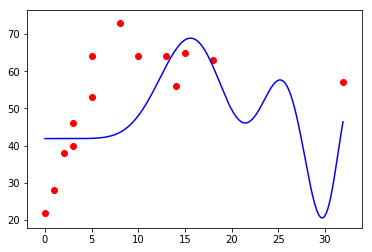

In [26]:
#(1 point)
# This plots the predicted ols fitted line
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ols2.predict(predictor_poly), color='blue') # Plot fitted model 

# Scatter plot the actual test data
plt.scatter(X_test,y_test,color='red')

## Predict on the Test data

In [27]:
#(1 point)
# Predict on the test data: y_pred
y_pred = ols2.predict(Xp_test)

# Computer and print R^2 and RMSE
print(ols2.score(Xp_test,yp_test))
print(np.sqrt(mean_squared_error(yp_test,y_pred)))

-0.36037932765159986
16.126422264088294


## a. Does this plot look better than the previous OLS plot? (1 point)

Yes, it fits better.
## b. Why? What do out of sample metrics tell you? (1 point)

Higher R^2 so the line is a better fit. 


# Ridge Regression, Part III

In [28]:
#(1 point)
# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")
# Create arrays for features (Lighted) and target variable (Temp)
yr = df[['Lighted']]
Xr = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)
Xr = pd.DataFrame(poly.fit_transform(Xr))
print("Dimensions of X after reshaping: {}".format(Xr.shape))
  
# Create training and test sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.3)

# Create a ridge regressor object called ridge with lambda = 0.1
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
ridge.fit(Xr_train,yr_train)

# The coefficients
print(ridge.coef_)

Dimensions of X after reshaping: (44, 16)
[[ 0.00000000e+00  1.44830147e+00 -2.68005401e-03 -4.56410863e-04
  -1.56277825e-05 -4.19412426e-07 -9.99061691e-09 -2.13402113e-10
  -3.83252990e-12 -4.11471384e-14  8.69776867e-16  8.62451828e-17
   4.31962826e-18  1.79910761e-19  6.87176510e-21  2.49695838e-22]]


## Plot outputs

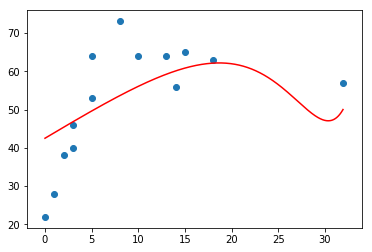

In [30]:
#(1 point)
# This plots the predicted ols fitted line
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ridge.predict(predictor_poly), color='red') # Plot fitted model 

# Scatter plot the actual test data
plt.scatter(X_test,y_test)

## a. Does this plot look better than the previous Polynomial plot? (1 point)
Yes this plot is looks better than the previous one.
## b. Why? What do out of sample metrics tell you? (1 point)
The residuals are smaller and the line is fitted better.

# Get the 5 fold CV Scores (R2) for all 3 models

In [31]:
#(1 points)

#ols
ols_scores = cross_val_score(ols, X, y, cv = 5, scoring = 'r2')
print("Cross-validated OLS scores:", ols_scores)

#ols2
poly_scores = cross_val_score(ols2, Xp, yp, cv = 5, scoring = 'r2')
print("Cross-validated OLS scores:", poly_scores)

# ridge
ridge_scores = cross_val_score(ridge, Xr, yr, cv = 5, scoring = 'r2')
print("Cross-validated OLS scores:", ridge_scores)

Cross-validated OLS scores: [-30.75075459  -0.04556113 -14.29669246  -2.24972457 -29.57476511]
Cross-validated OLS scores: [-2.54038802e+01 -5.24938593e-03 -1.73959354e+01 -3.38614874e+01
 -9.08622634e+14]
Cross-validated OLS scores: [-2.33809737e+01  2.19479692e-01 -1.09999672e+01 -4.16344039e-01
 -7.06842774e+04]


## Explain which model if any is best and why. (1 point)
The last model is the best because it has the closest fit to the data points and the highest R^2.

# Hyper Tune Lambda, K-fold Grid Search, Ridge Regression, Part IV

In [32]:
#(4 points)

# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
yh = df[['Lighted']]
Xh = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)
Xh = pd.DataFrame(poly.fit_transform(Xh))
print("Dimensions of X after reshaping: {}".format(Xh.shape))

# Create training and test sets with 0.3 hold out for test data
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size = 0.3)

# Setup a grid of lambdas (aka alphas) called param_grid of 20 lambdas from .001 to 2 
param_grid = {'alpha': np.linspace(0.001, 2.0, num = 20)}

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True)

# Setup the GridSearchCV object called grid_ridge for 5 folds using the param_grid above and ridge object
grid_ridge = GridSearchCV(ridge, param_grid, cv = 5)

# Train the model using the training sets 5 folds for all lambdas!
grid_ridge.fit(Xh_train,yh_train)

#Get the best lambda
best = grid_ridge.best_params_

# Create a final ridge regressor object called ridge_final using the best lambda from hypertuning
ridge_final = Ridge(alpha = best['alpha'], normalize = True)

# Now fit this model on the test data 
grid_ridge.fit(Xh_test, yh_test)


Dimensions of X after reshaping: (44, 16)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 1.06211e-01, 2.11421e-01, 3.16632e-01, 4.21842e-01,
       5.27053e-01, 6.32263e-01, 7.37474e-01, 8.42684e-01, 9.47895e-01,
       1.05311e+00, 1.15832e+00, 1.26353e+00, 1.36874e+00, 1.47395e+00,
       1.57916e+00, 1.68437e+00, 1.78958e+00, 1.89479e+00, 2.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

## Plot outputs

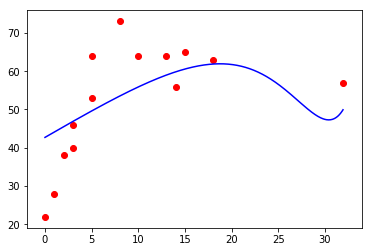

In [35]:
#(1 point)
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
ridge_final.fit(Xr_train,yr_train)
plt.plot(predictor_space, ridge_final.predict(predictor_poly), color = 'blue') # Plot fitted model 

# Scatter plot the actual test data
plt.scatter(X_test, y_test, color = 'red')

## Final scores given tuned lambda

In [37]:
#(1 point)
# Predict on the test data: y_pred
y_pred = ridge_final.predict(Xh_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(ridge_final.score(Xh_test,yh_test)))
rmse = np.sqrt(mean_squared_error(yh_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5682070064104552
Root Mean Squared Error: 8.060087983758553


## a. How does your final score (R2) compare to before? (1 point)
Current R^2 is much higher than past R^2.
## b. What about your fit to the data graphically? (1 point)
Graphically, the line goes through the majority of data points and doesnt wiggle as much as the second one.
## c. Why do you think the fit is better or worse using Ridge and hypertuning your lambda paramater? (2 point)
Hypertuning the lambda parameter creates a better line of fit because it optimizes the beta coefficients to give us a more efficient model.